In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import sklearn
import tensorflow
%matplotlib inline
plt.rcParams['figure.figsize'] =14,8

Using TensorFlow backend.


In [4]:
import os
os.chdir('C:\\Users\\Sharif Niyaz\\Documents\\jupyter_notebook\\machine-learning\\deep-learning\\RecurrentNeuralNetwork-LSTM')
import warnings
warnings.filterwarnings('ignore')

### STEP 1: Loading Dataset of Mid cap technology stock - Teradata

In [5]:
dataset=pd.read_csv('tera_data_price_train.csv')
dataset.head()

,date,close,volume,open,high,low
0,3/28/2013,58.51,1436742,57.12,58.55,57.0001
1,4/1/2013,57.02,1095631,58.65,58.65,56.9800
2,4/2/2013,57.16,839721,57.21,57.61,56.9400
3,4/3/2013,56.07,1268233,57.42,57.42,55.9000
4,4/4/2013,51.89,17965140,56.00,56.00,50.4000


In [7]:
training_set =dataset.iloc[:,1:2].values


We dont have missing values . No categorical variables present .
We have created Training set and Test set. So we directly go to Scaling
For RNN better Scaler is Normalizer Scaler

### STEP 2: Data Preprocessing

In [9]:
from sklearn.preprocessing import MinMaxScaler
## We will have the Feature between values 0 and 1  ###########################
sc= MinMaxScaler(feature_range=(0,1))
training_set_scaled =sc.fit_transform(training_set)
training_set_scaled

array([[ 0.85155324],
       [ 0.81622006],
       [ 0.81953996],
       ..., 
       [ 0.42992649],
       [ 0.40241878],
       [ 0.38297368]])

### STEP 3: Creating Training set
We will test training set using various time step. For that we have to test using K-Fold Cross Validation.
K-Fold will get us perfect value for time step without overfirring.

In [10]:
X_train=[]
Y_train=[]
for i in range(60,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i])
    Y_train.append(training_set_scaled[i])
X_train,Y_train=np.array(X_train),np.array(Y_train)

Currently we have 1 dimension. Now we can add other dimensions

In [11]:
X_train=X_train.reshape((X_train.shape[0],X_train.shape[1],1))

### STEP 4: Creating RNN - Recurrent Neural Network

In [12]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.models import Sequential

In [13]:
## 4 Layers of LSTM in our output

regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(rate=0.2))

In [14]:
### Full connection Layer i.e ANN to RNN
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')

### STEP 5 : Training the network

In [15]:
regressor.fit(X_train,Y_train,batch_size=32,epochs=100)

Epoch 1/100
1200/1200 [==============================] - 14s 12ms/step - loss: 0.0291
Epoch 2/100
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0058
Epoch 3/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0061
Epoch 4/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0056
Epoch 5/100
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0044
Epoch 6/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0043
Epoch 7/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0043
Epoch 8/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0041
Epoch 9/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0038
Epoch 10/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0038
Epoch 11/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0032
Epoch 12/100
1200/1200 [==============================] - 8s 7ms/step - 

In [22]:
dataset_test=pd.read_csv('tera_data_price_test.csv')
test_set_real =dataset_test.iloc[:,1:2].values

### STEP 6: Predicting prices for given test data

In [23]:
# to predict we need both test and training set
dataset_total=pd.concat([dataset,dataset_test],axis=0)

In [24]:
dataset_total.reset_index(drop=True,inplace=True)

In [29]:
input_data=dataset_total[len(dataset_total)-len(dataset_test)-60:]
input_data=input_data.iloc[:,1:2].values
input_data=sc.transform(input_data)
len(input_data)

105

In [32]:
x_test=[]
for i in range(60,105):
    x_test.append(input_data[i-60:i,0])
x_test=np.array(x_test)
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1],1))
test_set_pred= regressor.predict(x_test)
test_set_pred=sc.inverse_transform(test_set_pred)

### STEP 7: Plotting actual prices and predicted prices 

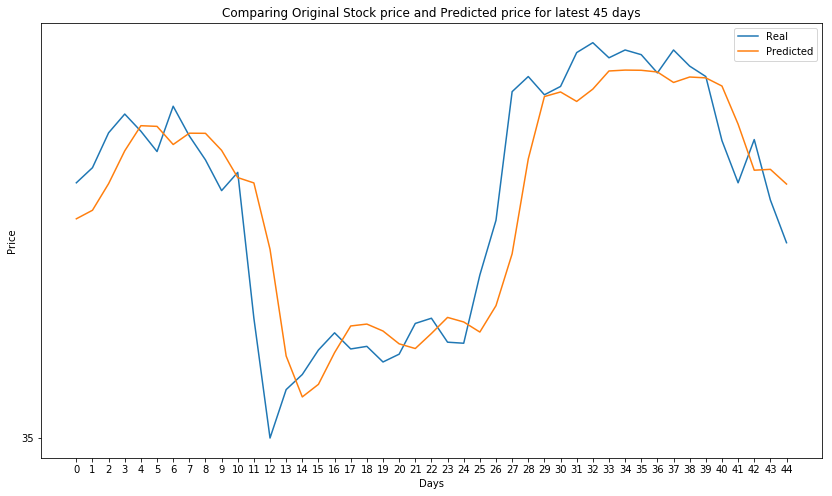

In [36]:
plt.plot(test_set_real,label="Real")
plt.plot(test_set_pred,label="Predicted")
plt.legend()
plt.xticks(np.arange(0,len(test_set_pred)))
plt.xlabel("Days")
plt.yticks(np.arange(min(min(test_set_pred),min(test_set_real)),max(max(test_set_pred),max(test_set_real)),10))
plt.ylabel("Price")
plt.title("Comparing Original Stock price and Predicted price for latest 45 days")
plt.show()